In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft


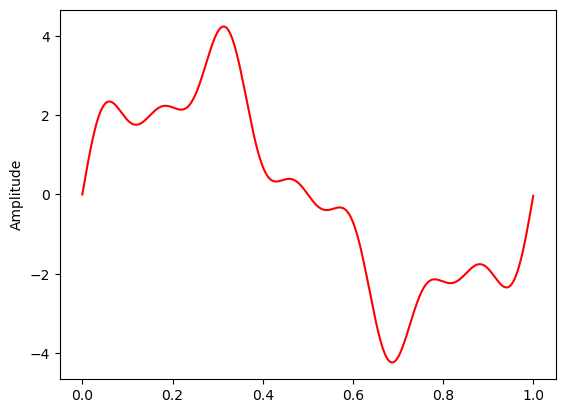

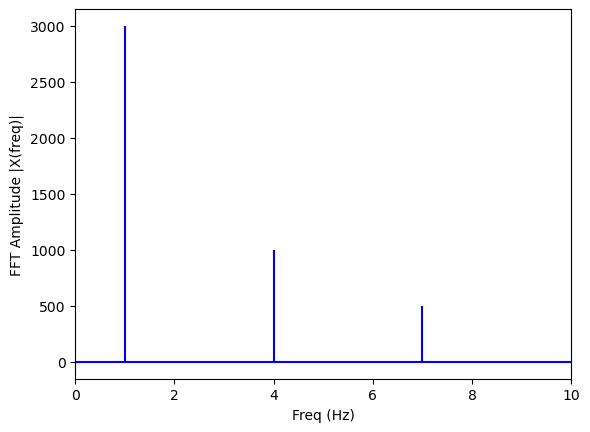

In [6]:

sample_rate = 2000
sample_interval = 1.0 / sample_rate
time = np.arange(0, 1, sample_interval)

# Generate data
freq = 1.
x = 3 * np.sin(2 * np.pi * freq * time)

freq = 4
x += np.sin(2 * np.pi * freq * time)

freq = 7
x += 0.5 * np.sin(2 * np.pi * freq * time)

# Plot the data
plt.plot(time, x, 'r')
plt.ylabel('Amplitude')
plt.show()

# Compute the Fourier transform
X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sample_rate
freq = n/T

# Plot the Fourier transform
plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)
plt.show()

In [58]:
# read sample data
data = []

with open('imu_data_sample.txt', 'r') as file:
    for line in file:
        # Split the line into values and convert them to the appropriate data type
        values = line.strip().split(',')
        data.append(values)

data = np.array(data).astype(float)

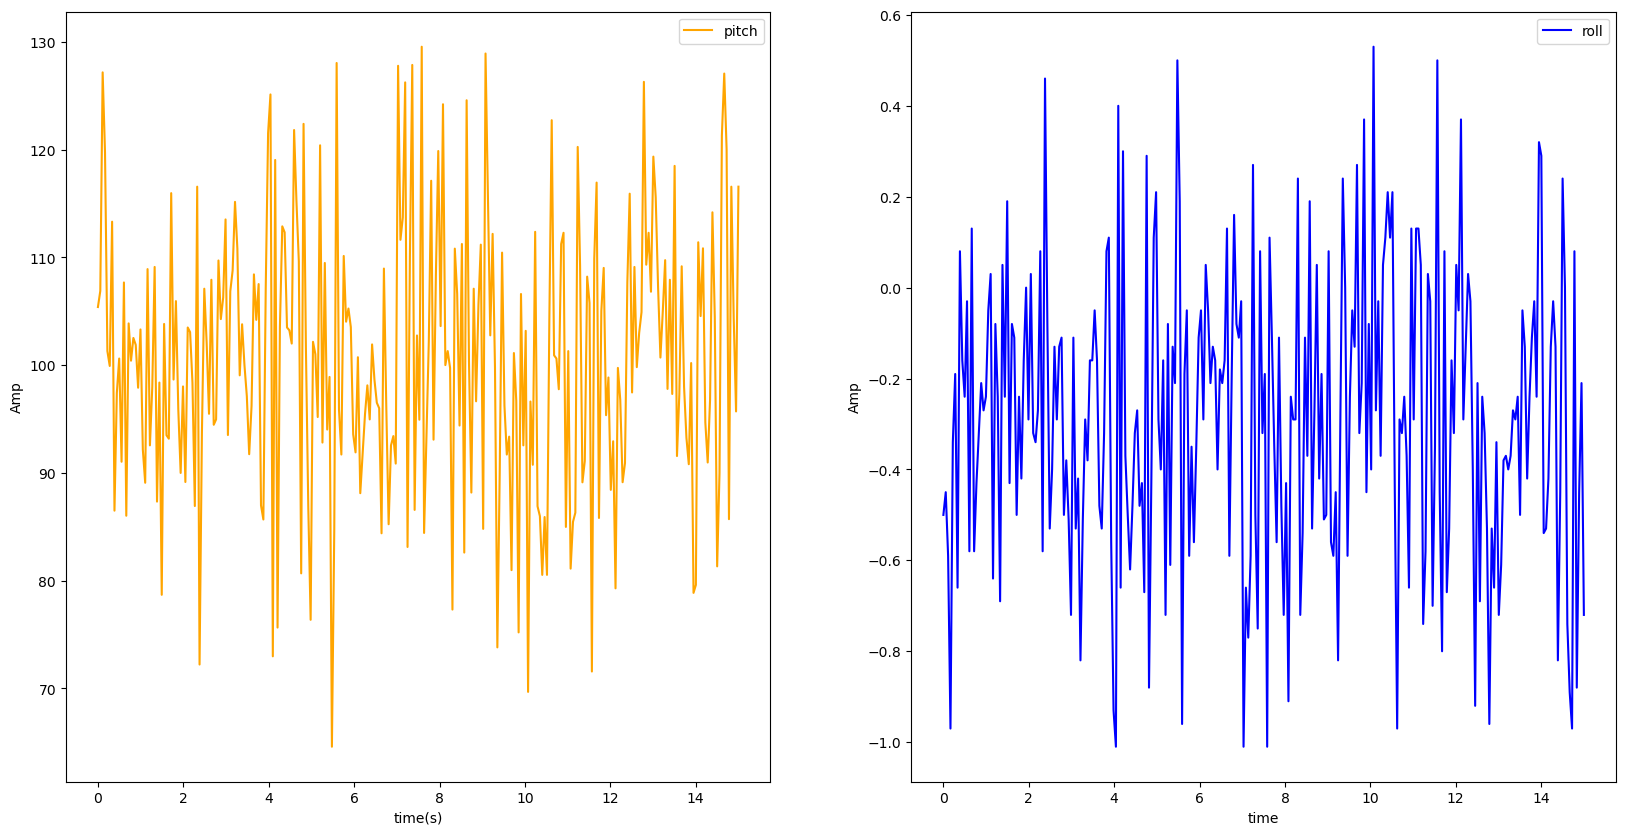

In [61]:
N = np.shape(data)[0]
time = np.linspace(0, 15, N) # totally recorded 15000ms


plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.plot(time, data[:, 0], label="pitch", color="orange")
plt.xlabel("time(s)")
plt.ylabel("Amp")
plt.legend()
plt.subplot(122)
plt.plot(time, data[:, 1], label="roll", color="blue")
plt.xlabel("time")
plt.ylabel("Amp")
plt.legend()

plt.show()

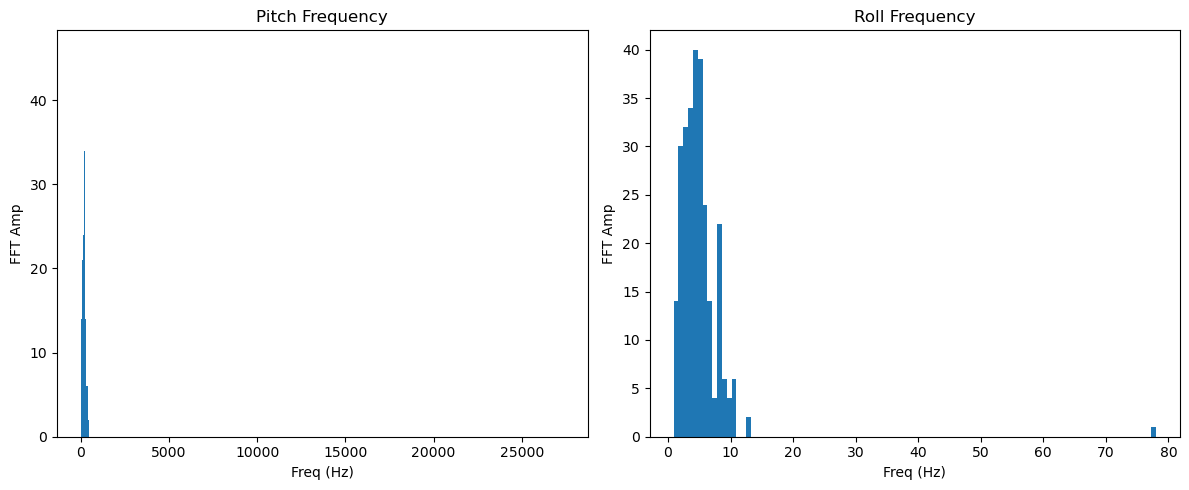

In [60]:
pitch_fft = np.fft.fft(data[:, 0])
roll_fft = np.fft.fft(data[:, 1])

# Get frequencies
freqs = np.fft.fftfreq(len(pitch_fft))

# Plot histogram of frequencies for each column
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(np.abs(pitch_fft), bins=1000)
plt.title('Pitch Frequency')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amp')

plt.subplot(1, 2, 2)
plt.hist(np.abs(roll_fft), bins=100)
plt.title('Roll Frequency')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amp')

plt.tight_layout()
plt.show()

37


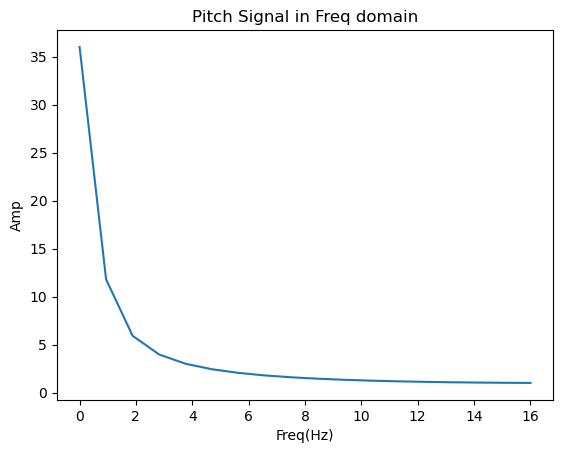

In [9]:

N = time_data.size
print(N)
freq = np.linspace(0, 16, int(N/2))
freq_data = fft(time_data)
y = 2/N * np.abs(freq_data[0:int(N/2)])

plt.plot(freq, y)
plt.title("Pitch Signal in Freq domain")
plt.xlabel("Freq(Hz)")
plt.ylabel("Amp")
plt.show()